In [ ]:
#Importing all the required libraries.
import numpy as nm   
import matplotlib.pyplot as plt   
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
#Loading the dataset into the variable dataset and displaying it.
dataset  = pd.read_csv('/content/pop-cases.csv')
dataset

,Population,Cases
0,15000,3900
1,15000,1000
2,16000,2000
3,16000,1500
4,17000,4000
...,...,...
95,60000,6200
96,60000,7700
97,60000,7000
98,61000,8200


In [ ]:
#Storing into x the dataset values and displaying it.
x = dataset.iloc[:, [0,1]].values
x

array([[15000,  3900],
       [15000,  1000],
       [16000,  2000],
       [16000,  1500],
       [17000,  4000],
       [17000,  3600],
       [18000,  2600],
       [18000,  4000],
       [19000,  3000],
       [19000,  2700],
       [19000,  1400],
       [19000,  2900],
       [20000,  1500],
       [20000,  2700],
       [20000,  1300],
       [20000,  3900],
       [21000,  3500],
       [21000,  2600],
       [23000,  2900],
       [23000,  1800],
       [24000,  2500],
       [24000,  4300],
       [25000,  2500],
       [25000,  3100],
       [28000,  1400],
       [28000,  2400],
       [28000,  3200],
       [28000,  1600],
       [29000,  4100],
       [29000,  1900],
       [30000,  4000],
       [30000,  5300],
       [33000,  4900],
       [33000,  9200],
       [33000,  8400],
       [33000,  8100],
       [34000,  8700],
       [34000,  7300],
       [37000,  7600],
       [37000,  7500],
       [38000,  8500],
       [38000,  9200],
       [39000,  7600],
       [390

[20592209100.0, 5033024915.110356, 2199940152.412281, 1301086730.7692306, 787980874.3478744, 596330786.4357865, 442138607.6097106, 362420217.4459528, 282968946.07843137, 239205731.7927171]


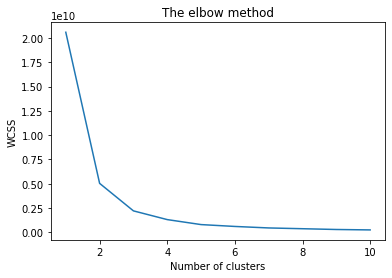

In [ ]:
#Using the elbow method to find the optimum number of clusters.
wcss=[]
for i in range(1,11):
    k_means=KMeans(n_clusters=i,init='k-means++',random_state=42)
    k_means.fit(x)
    wcss.append(k_means.inertia_)
print(wcss)
x_range=range(1,11)
plt.plot(x_range,wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Training the KMeans model with number of clusters=2 and method of initialization as k-means++ with random satate of 24
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=24)
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=24, tol=0.0001, verbose=0)

In [ ]:
#Predicting the clusters based on the data and model.
y_kmeans=kmeans.predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

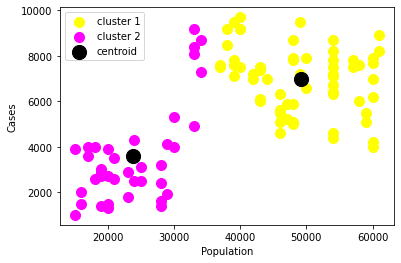

In [ ]:
#Plotting the clusters
plt.scatter(x[y_kmeans==0,0],x[y_kmeans==0,1],s=100,c='yellow',label='cluster 1')
plt.scatter(x[y_kmeans==1,0],x[y_kmeans==1,1],s=100,c='magenta',label='cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=200,c='black',label='centroid')
plt.xlabel('Population')
plt.ylabel('Cases')
plt.legend()
plt.show()